# Install Packages

In [ ]:
!pip install -q python-doctr[torch]
!pip install -q tf2onnx
!pip install -q tensorflow_addons
!pip install -q transformers
!pip install -q pytorch_lightning

     |████████████████████████████████| 239 kB 4.1 MB/s 
     |████████████████████████████████| 89 kB 9.2 MB/s 
     |████████████████████████████████| 604 kB 83.9 MB/s 
     |████████████████████████████████| 163 kB 96.5 MB/s 
     |████████████████████████████████| 981 kB 76.8 MB/s 
     |████████████████████████████████| 261 kB 90.6 MB/s 
     |████████████████████████████████| 3.2 MB 59.3 MB/s 
     |████████████████████████████████| 2.2 MB 59.6 MB/s 
     |████████████████████████████████| 235 kB 71.3 MB/s 
     |████████████████████████████████| 2.8 MB 56.8 MB/s 
     |████████████████████████████████| 112 kB 89.0 MB/s 
     |████████████████████████████████| 2.0 MB 69.4 MB/s 
     |████████████████████████████████| 965 kB 72.6 MB/s 
     |████████████████████████████████| 357 kB 84.4 MB/s 
     |████████████████████████████████| 705 kB 86.6 MB/s 
     |████████████████████████████████| 442 kB 4.3 MB/s 
     |████████████████████████████████| 13.1 MB 32.1 MB/s 
     |███████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models/parseq
!pip install -r requirements.txt

/content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models/parseq
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 585 kB 4.2 MB/s 
     |████████████████████████████████| 548 kB 55.3 MB/s 
     |████████████████████████████████| 298 kB 70.6 MB/s 
     |████████████████████████████████| 3.1 MB 72.1 MB/s 
     |████████████████████████████████| 151 kB 78.5 MB/s 
     |████████████████████████████████| 50 kB 4.6 MB/s 
     |████████████████████████████████| 54.5 MB 1.1 MB/s 
     |████████████████████████████████| 993 kB 24.4 MB/s 
     |████████████████████████████████| 79 kB 8.7 MB/s 
     |████████████████████████████████| 117 kB 56.4 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 363 kB 77.8 MB/s 
     |████████████████████████████████| 713 kB 89.8 MB/s 
     |████████████████████████████████| 361 kB 89.3 MB/s 
     |█████████████████████

In [ ]:
# Install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html

# Install mmdetection
!pip install mmdet

# Install mmocr
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -r requirements.txt
!pip install -v -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.6 MB 1.2 MB/s 
     |████████████████████████████████| 190 kB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.1 MB/s 
fatal: destination path 'mmocr' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models/parseq/mmocr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61 kB 493 kB/s 
     |████████████████████████████████| 103 kB 27.7 MB/s 
     |████████████████████████████████| 100 kB 11.

## Load Packages

In [ ]:
import os
import string
import argparse

import cv2 as cv
import numpy as np
import pandas as pd

import torch
import torch.utils.data
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

from PIL import Image

### CUDA Check
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

device: cuda


In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(mmcv.__version__)
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check mmocr installation
import mmocr
print(mmocr.__version__)

1.12.1+cu113 True
2.25.3
1.6.2
11.3
GCC 9.3
0.6.2


# Load OCR Text Detection pretrained model

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models/parseq

from strhub.data.module import SceneTextDataModule
from strhub.models.utils import load_from_checkpoint, parse_model_args
from transformers import AutoTokenizer, AutoModelForTokenClassification

/content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models/parseq


# Text Detection & Text Recognition & Name Entity Recognition

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models/parseq/mmocr

from mmocr.utils.ocr import MMOCR
detection_model = MMOCR(det='TextSnake', recog=None) # DBPP_r50, TextSnake

/content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models/parseq/mmocr
load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth


Downloading: "https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth" to /root/.cache/torch/hub/checkpoints/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth


  0%|          | 0.00/139M [00:00<?, ?B/s]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/OCR_pipeline

def get_PII_result(FILE_NAME, DETECTION_MODEL, RECOG_CKPT, DEVICE, MODEL_NAME):

    ############ 1. Text detection ############
    ### Load image
    image_path = f"leaflet/{FILE_NAME}"
    image = cv.imread(image_path)
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    #leaflet_image = DocumentFile.from_images(image_path)
    #original_axis_x, original_axis_y = leaflet_image[0].shape[1], leaflet_image[0].shape[0]

    ### data to Model
    #detection_model = MMOCR(det='TextSnake', recog=None)
    crop_result = DETECTION_MODEL.readtext(image_path, output=f'contour_output/{FILE_NAME}')
    json_output = crop_result[0]['boundary_result']

    file_name = os.listdir(f'contour_output/{FILE_NAME}')[0]
    predicted_img = mmcv.imread(f'contour_output/{FILE_NAME}/{file_name}')
    plt.figure(figsize=(9, 16))
    plt.imshow(mmcv.bgr2rgb(predicted_img))
    plt.show()

    ### 좌표 구하기
    cnt = 0
    for i in range(len(json_output)):
        x_list = []
        y_list = []
        
        for j in range(0, len(json_output[i]), 2):
            x_list.append(json_output[i][j])

        for j in range(1, len(json_output[i]), 2):
            y_list.append(json_output[i][j])

        x_list = x_list[:-1]
        y_list = y_list[:-1]
        
        ### 좌표도출
        x1 = np.min(x_list).astype(int)
        y1 = np.min(y_list).astype(int)
        x2 = np.max(x_list).astype(int)
        y2 = np.max(y_list).astype(int)

        ### 그림그리기
        img_cropped = image[y1:y2, x1:x2, :]
        cv.imwrite(f'contour_output/{FILE_NAME}/{FILE_NAME}_sample{cnt+1}.jpg', img_cropped)

        cnt += 1


    ############ 2. Text Recognition ############
    img_names, output = [], []
    image_folder = f'contour_output/{FILE_NAME}/' # contour output이 저장되는 폴더명
    model_str = load_from_checkpoint(checkpoint_path=RECOG_CKPT).eval().to(DEVICE)
    img_transform = SceneTextDataModule.get_transform(model_str.hparams.img_size)

    for path, _, fnames in os.walk(image_folder):
        for fname in fnames:
            fname = path+fname
            # Load image and prepare for input
            image = Image.open(fname).convert('RGB')
            image = img_transform(image).unsqueeze(0).to(device)

            p = model_str(image).softmax(-1)
            pred, p = model_str.tokenizer.decode(p)
            img_names.append(fname)
            output.append(pred[0])

    df = pd.DataFrame({'image_names':img_names, 'outputs':output})
    #crop_result.show(leaflet_image)

    
    ########## 3. Name Entity Recognition ############
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

    unique_tags = {'B-LOC', 'B-PER', 'I-LOC', 'I-PER', 'O'}
    tag2id = {'I-PER': 0, 'B-LOC': 1, 'B-PER': 2, 'O': 3, 'I-LOC': 4}
    id2tag = {0: 'I-PER', 1: 'B-LOC', 2: 'B-PER', 3: 'O', 4: 'I-LOC'}

    model_ner = AutoModelForTokenClassification.from_pretrained('/content/drive/MyDrive/Colab Notebooks/SKT_AIF/NER model/koelectra', num_labels=len(unique_tags))
    model_ner.to(DEVICE)

    pad_token_id = tokenizer.pad_token_id
    cls_token_id = tokenizer.cls_token_id
    sep_token_id = tokenizer.sep_token_id
    pad_token_label_id = tag2id['O']
    cls_token_label_id = tag2id['O']
    sep_token_label_id = tag2id['O']

    def ner_tokenizer(sent, max_seq_length):
        pre_syllable = "_"
        input_ids = [pad_token_id] * (max_seq_length - 1)
        attention_mask = [0] * (max_seq_length - 1)
        token_type_ids = [0] * max_seq_length
        sent = sent[:max_seq_length - 2]

        for i, syllable in enumerate(sent):
            if syllable == '_':
                pre_syllable = syllable
            if pre_syllable != "_":
                syllable = '##' + syllable
            pre_syllable = syllable

            input_ids[i] = (tokenizer.convert_tokens_to_ids(syllable))
            attention_mask[i] = 1

        input_ids = [cls_token_id] + input_ids
        input_ids[len(sent) + 1] = sep_token_id
        attention_mask = [1] + attention_mask
        attention_mask[len(sent) + 1] = 1
        return {"input_ids": input_ids,
                "attention_mask": attention_mask,
                "token_type_ids": token_type_ids}

    def ner_inference(text):
        words = []
        tags = []
        model_ner.eval()
        text = text.replace(' ', '_')

        predictions, true_labels = [], []

        tokenized_sent = ner_tokenizer(text, len(text) + 2)
        input_ids = torch.tensor(tokenized_sent['input_ids']).unsqueeze(0).to(device)
        attention_mask = torch.tensor(tokenized_sent['attention_mask']).unsqueeze(0).to(device)
        token_type_ids = torch.tensor(tokenized_sent['token_type_ids']).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model_ner(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)

        logits = outputs['logits']
        logits = logits.detach().cpu().numpy()
        label_ids = token_type_ids.cpu().numpy()

        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.append(label_ids)

        pred_tags = [list(tag2id.keys())[p_i] for p in predictions for p_i in p]

        #print('{}\t{}'.format("TOKEN", "TAG"))
        #print("===========")
        # for token, tag in zip(tokenizer.decode(tokenized_sent['input_ids']), pred_tags):
        #   print("{:^5}\t{:^5}".format(token, tag))
        for i, tag in enumerate(pred_tags):
            #print("{:^5}\t{:^5}".format(tokenizer.convert_ids_to_tokens(tokenized_sent['input_ids'][i]), tag))
            words.append(tokenizer.convert_ids_to_tokens(tokenized_sent['input_ids'][i]))
            tags.append(tag)
        return words, tags

    #words_list = []
    tags_list = [] 

    for text in df['outputs']:
        words, tags = ner_inference(text)
        tags_list.append(tags)
    
    df['tag_list'] = tags_list
    df['tag'] = pd.Series(tags_list).apply(lambda x : list(set(x)))


    ########## 4. PII detection ############
    df['pii'] = 0
    for i in range(df['tag_list'].shape[0]):
        if ('B-PER' in list(set(df['tag_list'][i])) and 'I-PER' in list(set(df['tag_list'][i]))) or ('B-LOC' in list(set(df['tag_list'][i])) and 'I-LOC' in list(set(df['tag_list'][i]))):
            df['pii'][i] = 1
        else:
            continue

    return df

/content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/OCR_pipeline


/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


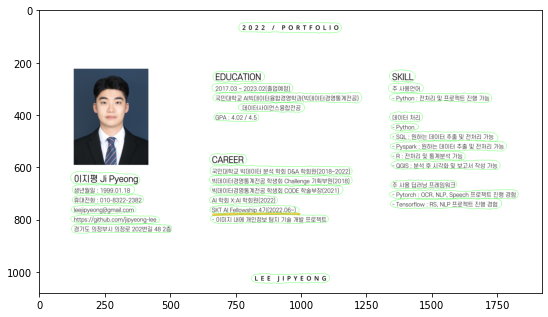

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
FILE_NAME = '004.png'
MODEL_NAME = 'monologg/koelectra-base-v3-discriminator'

# Text Cropping결과를 저장할 폴더 생성
if 'contour_output' not in os.listdir():
    os.mkdir('contour_output')

if FILE_NAME not in os.listdir('contour_output/'):
    os.mkdir(f'contour_output/{FILE_NAME}')

# OCR 결과 출력
df = get_PII_result(FILE_NAME=FILE_NAME,
                    DETECTION_MODEL=detection_model, 
                    RECOG_CKPT='/content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models/outputs/parseq/2022-10-25_13-56-51/checkpoints/epoch=0-step=1000-val_accuracy=95.6247-val_NED=98.4184.ckpt',
                    DEVICE=device,
                    MODEL_NAME=MODEL_NAME)

In [ ]:
df.loc[2, 'outputs']

'경기도 의정부시 의정로 200번길 482층'

In [ ]:
import pandas as pd

testset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models/testset.csv')
testset = testset.dropna().reset_index(drop=True)
testset['ref_text'] = testset['ref_text'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
testset.shape

(122123, 2)

In [ ]:
index_list = []

for i in range(testset.shape[0]):
    if len(testset['ref_text'][i]) < 3:
        index_list.append(i)
    else:
        continue

In [ ]:
testset = testset.drop(index_list).reset_index(drop=True)
testset.shape

(72225, 2)

In [ ]:
testset = testset[:10000]

In [ ]:
testset

,img_pathname,ref_text
0,data/test2/5350066-1998-0001-1278_1.jpeg,산지오염
1,data/test2/5350066-1998-0001-1278_2.jpeg,방지로
2,data/test2/5350066-1998-0001-1278_3.jpeg,쾌적한
3,data/test2/5350066-1998-0001-1278_4.jpeg,산림자원
4,data/test2/5350066-1998-0001-1278_10.jpeg,621010
...,...,...
9995,data/test2/5350066-2001-0001-1320_64.jpeg,김해시준농림지역내식품접객업및숙박업소설치제한조례폐지조례
9996,data/test2/5350066-2001-0001-1320_67.jpeg,김해시재무회계규칙중개정규칙
9997,data/test2/5350066-2001-0001-1320_73.jpeg,공보감사과장
9998,data/test2/5350066-2001-0001-1320_81.jpeg,공보게재


In [ ]:
testset['pred_text'] = ' '

In [ ]:
RECOG_CKPT = '/content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models/outputs/parseq/2022-10-25_13-56-51/checkpoints/epoch=0-step=1000-val_accuracy=95.6247-val_NED=98.4184.ckpt'
DEVICE = device

model_str = load_from_checkpoint(checkpoint_path=RECOG_CKPT).eval().to(DEVICE)
img_transform = SceneTextDataModule.get_transform(model_str.hparams.img_size)

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models/

/content/drive/MyDrive/Colab Notebooks/SKT_AIF/OCR/OCR/models


In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(range(testset.shape[0])):
    try:
        image_path = testset['img_pathname'][i]
        image = Image.open(image_path).convert('RGB')
        image = img_transform(image).unsqueeze(0).to(device)
        p = model_str(image).softmax(-1)
        pred, p = model_str.tokenizer.decode(p)
        testset['pred_text'][i] = pred[0]
    except:
        continue

100%|██████████| 10000/10000 [1:40:49<00:00,  1.65it/s]


inference 0.6049

In [ ]:
testset['pred_text'] = testset['pred_text'].str.replace(pat=r'[^\w]', repl=r'', regex=True)

In [ ]:
testset.to_csv('testset_parseq.csv', index=False)

In [ ]:
testset.head(30)

,img_pathname,ref_text,pred_text
0,data/test2/5350066-1998-0001-1278_1.jpeg,산지오염,
1,data/test2/5350066-1998-0001-1278_2.jpeg,방지로,
2,data/test2/5350066-1998-0001-1278_3.jpeg,쾌적한,
3,data/test2/5350066-1998-0001-1278_4.jpeg,산림자원,
4,data/test2/5350066-1998-0001-1278_10.jpeg,621010,
5,data/test2/5350066-1998-0001-1278_12.jpeg,김해시,김해시
6,data/test2/5350066-1998-0001-1278_13.jpeg,부원동,부원동
7,data/test2/5350066-1998-0001-1278_14.jpeg,611,611
8,data/test2/5350066-1998-0001-1278_16.jpeg,0525322715,0525322715
9,data/test2/5350066-1998-0001-1278_17.jpeg,전송361978,전송361978


In [ ]:
!pip install -q pybind11
!pip install -q fastwer

In [ ]:
import fastwer
import pandas as pd

In [ ]:
testset['cer'] = 0
testset['wer'] = 0

for i in range(testset.shape[0]):
    cer = fastwer.score_sent(testset['pred_text'][i], testset['ref_text'][i], char_level=True)
    wer = fastwer.score_sent(testset['pred_text'][i], testset['ref_text'][i], char_level=False)
    testset['cer'][i] = cer
    testset['wer'][i] = wer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mean_cer = testset['cer'].mean()
mean_wer = testset['wer'].mean()
print(f'Mean CER = {mean_cer}%, Mean WER = {mean_wer}%')

Mean CER = 0.6402%, Mean WER = 3.27%


In [ ]:
testset.head(50)

,img_pathname,ref_text,pred_text,cer,wer
0,data/test2/5350066-1998-0001-1278_1.jpeg,산지오염,,100,100
1,data/test2/5350066-1998-0001-1278_2.jpeg,방지로,,100,100
2,data/test2/5350066-1998-0001-1278_3.jpeg,쾌적한,,100,100
3,data/test2/5350066-1998-0001-1278_4.jpeg,산림자원,,100,100
4,data/test2/5350066-1998-0001-1278_10.jpeg,621010,,100,100
5,data/test2/5350066-1998-0001-1278_12.jpeg,김해시,김해시,0,0
6,data/test2/5350066-1998-0001-1278_13.jpeg,부원동,부원동,0,0
7,data/test2/5350066-1998-0001-1278_14.jpeg,611,611,0,0
8,data/test2/5350066-1998-0001-1278_16.jpeg,0525322715,0525322715,0,0
9,data/test2/5350066-1998-0001-1278_17.jpeg,전송361978,전송361978,0,0
